In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline

### CSC 217 - Final Exam

For your final exam, you will be looking at a dataset from FiveThirtyEight that looks at the voting record of each member of the House of Representatives ever since Donald Trump has been elected. There are eight columns: last name, state, party (Republican or Democrat), votes (the total number of votes they cast), votes_for (the total number of votes they made that agreed with Trump's position on the issue), votes_against (the total number of votes they made that disagreed with Trump's position on the issue), vote_percentage (the percentage of their votes that agreed with Trump's position) and GDP (the GDP of the state their district is in). Keep in mind that there are multiple representatives for most states. As an FYI, this data spans records from the last two Congresses (115th and 116th).

The data DOES NOT need to be cleaned beyond what has been provided.

Please write out your answer for each question.

There are 14 total questions and a bonus question. There are 70 possible points - the maximum score possible is 75/70 after the bonus question. Partial credit may be awarded on questions under my discretion.

The exam is due to me (via email - evan.agovino.ccny@gmail.com) by 9 PM. Late submissions will not be accepted.

Good luck and please reach out to me via email or Slack (preferably Slack) with questions.

In [2]:
total_df = pd.read_csv('data/total_df.csv')
total_df.head()

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
0,Abraham,LA,R,222,208,14,0.936937,53589
1,Adams,NC,D,236,31,204,0.135593,54441
2,Aderholt,AL,R,244,238,6,0.975410,45219
3,Aguilar,CA,D,242,52,190,0.214876,74205
4,Allen,GA,R,244,236,7,0.967213,55832


    1. How many members are in each party? (3 points)

In [3]:
total_df['party'].value_counts()

R    275
D    256
Name: party, dtype: int64

There are 275 Republicans and 256 Democrats.

    2. Which state has the most representatives? How many representatives does it have? (4 points)

In [4]:
total_df['state'].value_counts()

CA    61
TX    45
NY    31
FL    31
PA    26
IL    21
MI    18
OH    18
VA    16
NJ    16
GA    15
MN    13
NC    13
TN    12
AZ    12
IN    11
WA    11
MA    11
MD     9
CO     9
WI     9
SC     9
MO     8
OK     7
AL     7
CT     6
IA     6
LA     6
KS     6
UT     6
KY     6
NV     6
MS     5
NM     5
OR     5
AR     4
WV     4
ME     3
NE     3
NH     3
HI     3
ID     3
SD     2
ND     2
MT     2
RI     2
WY     1
DE     1
VT     1
AK     1
Name: state, dtype: int64

In [6]:
total_df.groupby('state').count().sort_values('last_name', ascending=False)

,last_name,party,votes,votes_for,votes_against,vote_percentage,gdp
state,,,,,,,
CA,61,61,61,61,61,61,61
TX,45,45,45,45,45,45,45
FL,31,31,31,31,31,31,31
NY,31,31,31,31,31,31,31
PA,26,26,26,26,26,26,26
IL,21,21,21,21,21,21,21
OH,18,18,18,18,18,18,18
MI,18,18,18,18,18,18,18
VA,16,16,16,16,16,16,16


California has 61 representatives, the most of any state.

    3. Plot a histogram of the vote percentage for each representative and describe what it looks like. (3 points)

(array([ 80., 115.,  43.,  11.,   4.,   2.,   5.,   6.,  40., 225.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

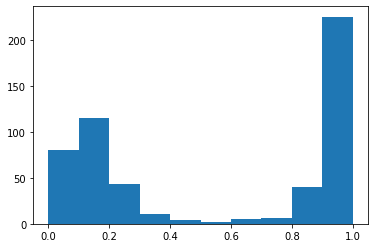

In [11]:
plt.hist(total_df['vote_percentage'])

This histogram is bimodal, as the largest frequencies of the distribution are at the extreme ends of the distribution.

    4. What is the maximum vote percentage in the dataset? How many representatives have that maximum vote percentage? (4 points)

The maximum vote percentage in the dataset is 1, or 100% - eight representatives have that maximum vote percentage.

In [12]:
total_df['vote_percentage'].max()

1.0

In [16]:
total_df[total_df['vote_percentage'] == total_df['vote_percentage'].max()].shape

(8, 8)

In [18]:
len(total_df[total_df['vote_percentage'] == total_df['vote_percentage'].max()])

8

In [20]:
total_df[total_df['vote_percentage'] == total_df['vote_percentage'].max()]

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
69,Chaffetz,UT,R,62,62,0,1.0,55550
209,Hern,OK,R,60,60,0,1.0,50613
245,Joyce,PA,R,54,54,0,1.0,61594
330,Miller,WV,R,54,54,0,1.0,43053
366,Pence,IN,R,52,52,0,1.0,55172
402,Rose,TN,R,54,54,0,1.0,53933
461,Steube,FL,R,54,54,0,1.0,48318
530,Zinke,MT,R,2,2,0,1.0,46609


In [13]:
total_df.sort_values('vote_percentage', ascending=False)

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
530,Zinke,MT,R,2,2,0,1.000000,46609
209,Hern,OK,R,60,60,0,1.000000,50613
402,Rose,TN,R,54,54,0,1.000000,53933
366,Pence,IN,R,52,52,0,1.000000,55172
461,Steube,FL,R,54,54,0,1.000000,48318
330,Miller,WV,R,54,54,0,1.000000,43053
245,Joyce,PA,R,54,54,0,1.000000,61594
69,Chaffetz,UT,R,62,62,0,1.000000,55550
40,Brady,TX,R,246,244,1,0.991870,61167
85,Collins,NY,R,242,240,1,0.991736,85746


    5. Find out how many total Republican and Democrat votes were for and against Trump's policies (hint: do a groupby and sum the 'votes_for' and 'votes_against' columns) (4 points)

8,163 Democratic votes were for Trump, while 39,779 Democratic votes were against Trump.

50,770 Republican votes were for Trump, while 3,608 Republican votes were against Trump.

In [21]:
total_df.groupby('party')[['votes_for', 'votes_against']].sum()

,votes_for,votes_against
party,,
D,8163,39779
R,50770,3608


In [22]:
total_df.groupby('party')['votes_for'].sum()

party
D     8163
R    50770
Name: votes_for, dtype: int64

In [23]:
total_df.groupby('party')['votes_against'].sum()

party
D    39779
R     3608
Name: votes_against, dtype: int64

    6. Now do a chi-squared test for homogeneity on the Democrats vs. Republicans to see if they could conceivably come from the same distribution (hint: use the methodology from this workbook:  https://github.com/CSC217/fall_2019/blob/master/week08-hypothesis_testing_ii/Hypothesis_Testing_II_Class_Workbook.ipynb). What is the Chi-squared score from the test? Can we reject the null hypothesis at a 0.05 signifiance level that Democrats and Republicans come from the same distribution, voting-wise? (8 points)

In [25]:
stats.chi2_contingency([[8163, 39779], [50770, 3608]])

(60791.45718371537, 0.0, 1, array([[27613.03641517, 20328.96358483],
        [31319.96358483, 23058.03641517]]))

Yes, given that the p-value of our chi-square test is 0, we can reject the null hypothesis that Republicans and Democrats come from the same distribution voting-wise.

    7. Given the number of degrees of freedom in the test, what would be the minimum Chi-square value necessary to reject the null hypothesis at a 0.05 signifiance level that the Democrats and Republicans come from the same distribution, voting-wise? (8 points)

The minimum chi-square value necessary to reject the null hypothesis at 1 degree of freedom at a 0.05 significance level is 3.84.

In [28]:
stats.chi2(df=1).ppf(0.95)

3.841458820694124

    8. What is the correlation between the GDP of the state a representative is representing and the percentage of time that representative agrees with Trump? Is the correlation statistically significant? (5 points)

The correlation between the GDP of the state a representative is representing and the percentage of time that representative agrees with Trump is -0.35. The correlation is statistically significant as the correlation has a p-value very close to 0.

In [32]:
stats.pearsonr(total_df['gdp'], total_df['vote_percentage'])

(-0.35709529391775846, 2.0512046772521333e-17)

    9. Find the linear relationship between GDP and the representative's likely percentage to vote. Plot the sdcatterplot with the predictive line on top of it. (6 points)

In [35]:
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(total_df['gdp'], total_df['vote_percentage'])

In [36]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [50]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(total_df['gdp'], total_df['vote_percentage'])

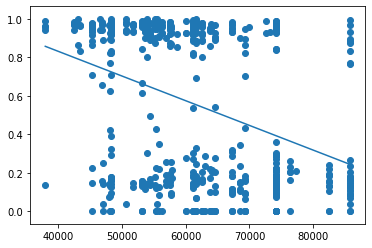

In [42]:
plt.scatter(total_df['gdp'], total_df['vote_percentage'])
sorted_order = np.argsort(total_df['gdp'])
plt.plot(total_df['gdp'][sorted_order], predictions[sorted_order])

    10. What is the R^2 value of this relationship? (5 points)

In [45]:
utils.get_r2(predictions, total_df['vote_percentage'])

0.12751704893821011

In [46]:
np.var(predictions) / np.var(total_df['vote_percentage'])

0.12751704893821011

In [48]:
np.power(stats.pearsonr(total_df['gdp'], total_df['vote_percentage'])[0], 2)

0.1275170489382103

    11. If a representative comes from a state with a GDP of $50,000, what is the predicted percentage of time that representative will vote with Trump? (5 points)

In [51]:
slope

-1.2824734290583527e-05

In [52]:
intercept

1.344139660917898

In [53]:
intercept + (slope * 50000)

0.7029029463887216

The predicted percentage of time a representative from a state with a GDP of $50,000 will vote for Trump is 70.29%.

    12. What is the average percentage of time that representatives agreed with Trump given that they came from states with a GDP *greater than* $45,000 and *less than* $55,000? (6 points)

In [58]:
total_df[(total_df['gdp'] < 55000) & (total_df['gdp'] > 45000)]['vote_percentage'].mean()

0.6620054458478446

The average percentage of time that representatives agreed with Trump given that they came from states with a GDP greater than \\$45,000 and less than $55,000 is about 66%.

    13. Plot the residuals plot. Is it homoskedastic or heteroskedastic? (5 points)

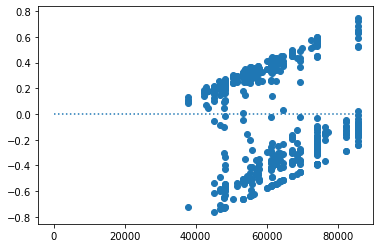

In [60]:
plt.scatter(total_df['gdp'], residuals)
plt.plot([0, total_df['gdp'].max()], [0,0], linestyle='dotted')

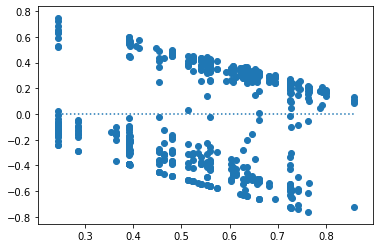

In [62]:
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')

The plot is heteroskedastic, as the residuals appear to have a pattern and are not randomly distributed around 0.

    14. Overall do you think there's a linear relationship between these two variables? Why or why not? (4 points)

We do not think that there is a linear relationship between these two variables because the residuals graph is heteroskedastic - the values are not randomly distributed around 0 but appear to have a pattern. If there was a linear relationship, the residuals plot would have residuals randomly scattered on either side of 0.

    15. *BONUS* Given that the data looks at GDP at the state-level and voting percentage at the representative level, what data would improve this data set? (5 points)

The GDP of the districts the representatives are in rather than the the state they are in could improve the data set.